In [31]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
df = pd.read_csv("covid19.csv")

df

,data,casos
0,2020-03-02 18:00:00,2
1,2020-03-03 18:00:00,4
2,2020-03-04 18:00:00,6
3,2020-03-05 18:00:00,9
4,2020-03-06 18:00:00,13
5,2020-03-07 18:00:00,21
6,2020-03-08 18:00:00,30
7,2020-03-09 18:00:00,39
8,2020-03-10 18:00:00,41
9,2020-03-11 17:00:00,59


In [33]:
df = df.loc[:,['data','casos']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-03-01 00:00:00", FMT)).days  )

In [34]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [46]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[2,20,2000])

In [47]:
fit


(array([4.02384774e+00, 2.91284991e+01, 1.35095051e+04]),
 array([[5.27871787e-03, 1.35041468e-02, 1.98452114e+01],
        [1.35041468e-02, 4.18823124e-02, 6.17219421e+01],
        [1.98452114e+01, 6.17219421e+01, 9.30573821e+04]]))

In [48]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

In [49]:
errors

[0.07265478556951453, 0.20465168555890267, 305.0530808280919]

In [50]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

In [51]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [52]:
y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]

mean_squared_error(y,y_pred_logistic)


4816.839450356353

In [53]:
#def exponential_model(x,a,b,c):
    #return a*np.exp(b*(x-c))
#exp_fit = curve_fit(exponential_model,x,y,p0=[2,20,2000])

In [54]:
#exp_fit


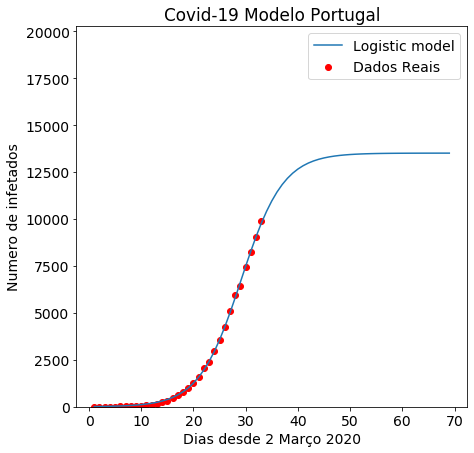

In [55]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Dados Reais",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
plt.legend()
plt.xlabel("Dias desde 2 Março 2020")
plt.ylabel("Numero de infetados")
plt.ylim(0, c*1.5)
plt.title("Covid-19 Modelo Portugal")
plt.show()

In [56]:
from datetime import timedelta, date
final = datetime.strptime("2020-03-02 00:00:00", FMT) + timedelta(days=sol)
final.strftime('End of pandemic predicted at: %d, %b %Y')

'End of pandemic predicted at: 11, May 2020'